In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Simulating from a Target Distribution with Importance Sampling

This section explores the use of importance sampling to simulate from a target distribution. We begin by considering the general case with an arbitrary instrumental distribution and then delve into a specific example.

### General Case with Arbitrary Instrumental Distribution

Consider the general case where we want to sample from a distribution with density $\pi(x)$ and we have an instrumental distribution with density $q(x)$. We can express the expectation of a function $h(x)$ under the target distribution as:

$$
\mathbb{E}_{\pi}[h(x)] = \int h(x) \pi(x) dx = \int h(x) \frac{\pi(x)}{q(x)} q(x) dx = \mathbb{E}_{q}\left[h(x) \frac{\pi(x)}{q(x)}\right]
$$

We can then draw samples $x_1, \dots, x_n$ from $q(x)$ and approximate the expectation using the importance sampling estimator:

$$
\hat{\mathbb{E}}_{\pi}[h(x)] = \frac{1}{n} \sum_{i=1}^{n} h(x_i) \frac{\pi(x_i)}{q(x_i)}
$$

The weights $w_i = \frac{\pi(x_i)}{q(x_i)}$ are called the importance weights.

### Case with Markov Chain and General Instrumental Distribution

Now, consider a more complex scenario where we have a sequence of variables $Y_1, \dots, Y_T$ and we want to sample from the joint distribution $p(y_1, \dots, y_T)$. We can introduce an instrumental distribution $q(y|x)$ and construct a Markov chain $X^{(0)}, X^{(1)}, \dots, X^{(T-1)}$ where each $X^{(t)}$ can take values in the set $\{Y_1, \dots, Y_t\}$.

The dependence between $Y_i$ and the set of previous variables $Y_j (j < i)$ complicates the expression of the joint distribution of $Y_i$ and $U$, which cannot be obtained in closed form for arbitrary $n$. In fact, although $(X^{(t)})$ is a Markov chain, $(Y_t)$ is not.

Let us denote:

$$
\begin{aligned}
\rho_{ij} &= \frac{f(y_j|y_i)}{g(y_j|y_i)} \wedge 1 \quad (j > i) \\
\bar{\rho}_{ij} &= \rho_{ij} q(y_{j+1}|y_j) \\
\underline{\rho}_{ij} &= (1 - \rho_{ij}) q(y_{j+1}|y_i) \quad (i < j < T) \\
\zeta_{jj} &= 1 \\
C_{jt} &= \prod_{l=j+1}^{t} \underline{\rho}_{jl} \quad (i < j < T) \\
\tau_0 &= 1 \\
\tau_j &= \sum_{t=0}^{j-1} \tau_t \zeta_{t(j-1)} \bar{\rho}_{tj} \quad (i < j < T) \\
\tau_T &= \sum_{t=0}^{T-1} \tau_t \zeta_{t(T-1)} \rho_{tT} \quad (i < T) \\
\omega_T^t &= 1 \\
\omega_i^j &= \bar{\rho}_{ji} \omega_{i+1}^i + \underline{\rho}_{ti} \omega_{i+1}^j \quad (0 \le j < i < T)
\end{aligned}
$$

Casella (1996) derives the following expression for the weights of $h(y_i)$ in $\delta^{RB}$.

**Theorem 7.21.** The estimator $\delta^{RB}$ satisfies:

$$
\delta^{RB} = \frac{\sum_{i=0}^{T} i \rho_i h(y_i)}{\sum_{i=0}^{T-1} \tau_i \zeta_{i(T-1)}}
$$

with $(i < T)$

$$
\phi_i = \tau_i \left[ \sum_{j=i+1}^{T-1} \zeta_{ij} \omega_{j+1}^i + \zeta_{i(T-1)} (1 - \mu_{iT}) \right]
$$

and $\phi_T = \tau_T$.

Although these estimators are more complex than in the independent case, the complexity of the weights is again of order $\mathcal{O}(T^2)$ since the computations of $\rho_{ij}$, $\zeta_{ij}$, $\tau_i$, and $\omega_j^k$ involve $T(T+1)/2$ multiplications. Casella and Robert (1996) give algorithmic advice toward easier and faster implementation.

### Example: Simulating from a $\mathcal{T}_3$ Distribution

Consider the simulation of a $\mathcal{T}_3$ distribution based on a random walk with perturbations distributed as $C(0, \sigma^2)$. The choice of $\sigma$ determines the acceptance rate for the Metropolis-Hastings algorithm. When $\sigma = 0.4$, it is about 0.33, and when $\sigma = 3.0$, it increases to 0.75.

As explained in Section 7.6.1, the choice $\sigma = 0.4$ is undoubtedly preferable in terms of efficiency of the algorithm. Table 7.5 confirms this argument.

**(Include Table 7.5 here)**

This example illustrates how the choice of the instrumental distribution and its parameters can significantly impact the efficiency of the simulation.

## Adaptive MCMC Schemes

This section discusses the challenges and limitations of generic Markov Chain Monte Carlo (MCMC) samplers and introduces the concept of adaptive MCMC schemes.

### Limitations of Generic MCMC Samplers

Generic MCMC proposals, such as random walk Metropolis-Hastings algorithms, often struggle in high-dimensional spaces and disconnected support scenarios. These methods can be inefficient in exploring the space of interest, leading to slow convergence.

The fundamental difficulty stems from the fact that the complexity of the target distribution, which necessitates the use of MCMC in the first place, makes it challenging to design efficient proposals.  A priori knowledge about the distribution, its support, or suitable proposal parameters is often limited, hindering the performance of generic algorithms.

As Neal (2003) points out, these limitations are inherent to the nature of complex distributions.

### The Need for Adaptive Schemes

While generic algorithms may fall short in complex scenarios, their initial runs can provide valuable information about the target distribution. This information can be leveraged to improve the efficiency of the MCMC sampler.

Adaptive MCMC methods aim to incorporate the information gathered during the initial steps of the algorithm to tune the proposal distribution and enhance exploration. Ideally, these methods would automate the process of optimizing the MCMC sampler, eliminating the need for manual tuning.

### Challenges of Adaptive MCMC

A crucial challenge in adaptive MCMC is that using the entire history of the Markov chain to update the proposal violates the Markov property. This means that standard convergence theorems for Markov chains no longer apply, and the validity of the adaptive algorithm needs to be established through other means.

Despite this challenge, adaptive MCMC remains an active area of research due to its potential to significantly improve the efficiency of MCMC sampling in complex problems.

**(Include Table 7.5 here)**

**Table 7.5:** Improvement brought by $\delta^{\mu\sigma}$ (in %) and quadratic risk of the empirical average (in parentheses) for different sample sizes and 50,000 simulations of the random walk based on $\mathcal{C}(0, \sigma^2)$ (Source: Casella and Robert 1996).

This table illustrates the performance of an adaptive importance sampling estimator ($\delta^{\mu\sigma}$) compared to the standard empirical average for different sample sizes and two different values of $\sigma$. The results show that the adaptive estimator can significantly reduce the quadratic risk, especially for smaller sample sizes. However, the improvement depends on the choice of $\sigma$, highlighting the importance of tuning the proposal distribution.

The table also shows that the gains brought by $\delta^{RB}$ are smaller compared to the independent case. They amount to approximately 8% and 25% for $\sigma = 0.4$ and 0.1% and 1% for $\sigma = 3$. Casella and Robert (1996) provide further comparisons with importance sampling estimators based on the same sample $y_1, \dots, y_n$.

## Adaptive MCMC: Pitfalls and Considerations

This section delves into the potential pitfalls of adaptive MCMC schemes, particularly focusing on the dangers of constantly adapting the proposal distribution based on the past performance of the simulated chain.

### Degeneration to Point Masses

One significant concern with adaptive algorithms is the risk of degenerating to point masses. This can occur if the algorithm excessively narrows the proposal distribution's variance, leading the chain to get trapped in a small region of the state space and failing to explore the full target distribution.

As noted in the text, "it may be that, in practice, such algorithms do degenerate to point masses because of a too-rapid decrease in the variation of their proposal."

### Example: Adaptive MCMC for t-distribution

Consider the example of sampling from a t-distribution $T(\nu, \theta, 1)$ with known $\nu$ and an unknown location parameter $\theta$. Assuming a flat prior $\pi(\theta) = 1$, we can implement a Metropolis-Hastings algorithm with an adaptive normal proposal distribution:

$$
\mu_t = \frac{1}{t} \sum_{i=1}^{t} \theta^{(i)}
$$

$$
\sigma_t^2 = \frac{1}{t} \sum_{i=1}^{t} (\theta^{(i)} - \mu_t)^2
$$

where $\mu_t$ and $\sigma_t^2$ are the empirical mean and variance of the chain's values up to iteration $t$.

The Metropolis-Hastings acceptance probability is given by:

$$
\prod_{i=1}^n \frac{f(x_i | \theta^{(t+1)})}{f(x_i | \theta^{(t)})} \frac{\phi(\theta^{(t)} | \mu_t, \sigma_t^2)}{\phi(\theta^{(t+1)} | \mu_t, \sigma_t^2)}
$$

where $f(x_i | \theta)$ is the likelihood of the i-th observation given $\theta$, and $\phi(\cdot | \mu, \sigma^2)$ is the normal probability density function with mean $\mu$ and variance $\sigma^2$.

However, this scheme is invalid because the proposal distribution depends on the entire sequence of $\theta$'s up to iteration $t$, violating the Markov property.

### Illustrative Figures and Issues

The text mentions three figures (7.6, 7.7, and 7.8) that illustrate the issues with this adaptive approach:

* **Fig.6:** Shows that if the initial range of values is too small, the sequence of $\theta$'s may not converge to the target distribution and concentrates on an insufficiently small support.

* **Fig.7 * Demonstrates that even with a correct range of simulated values, there can be a bias in the histogram (after a large number of iterations) due to the long-term dependence on past values.

* **Fig.8:** Shows that using a Gaussian kernel based on earlier simulations as the proposal distribution in an adaptive scheme may not lead to an acceptable approximation of the target distribution, even with a large number of iterations.

### Key Takeaway: Avoid Constant Adaptation

The main message is that constantly adapting the proposal distribution based on the past performance of the simulated chain is problematic. The text suggests two possible solutions:

1. **Cease Adaptation:** Stop adapting the proposal distribution after a burn-in period. Discard the samples from the burn-in period and use the remaining samples for computing expectations and other quantities of interest.

2. **Theoretically Assess Adaptation:**  Develop adaptive schemes that are theoretically sound and whose convergence properties can be rigorously established. This is a challenging task, and only a few examples exist in the literature.

In conclusion, while adaptive MCMC methods hold promise for improving sampling efficiency, they must be designed and implemented carefully to avoid pitfalls such as degeneration and bias. The text emphasizes the importance of either ceasing adaptation after a burn-in period or providing theoretical guarantees for the convergence of the adaptive scheme.

0.017217506951961704
0.9963328757828512


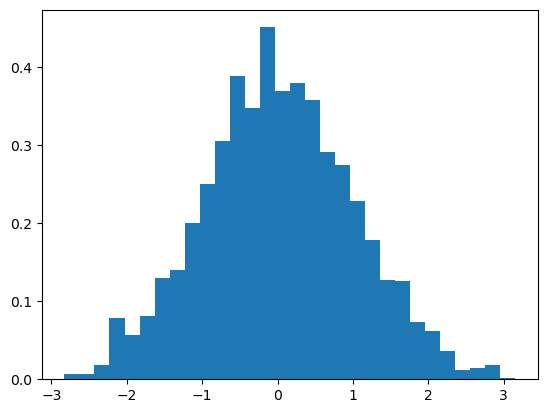

In [1]:
import numpy as np
import scipy.stats as stats

def adaptive_mcmc(target_log_pdf, initial_theta, n_samples, burn_in=1000, adaptation_interval=100):
    """
    Adaptive MCMC (with important caveats - see below).

    Args:
        target_log_pdf: The log of the target probability density function.
        initial_theta: Initial value for the chain.
        n_samples: Total number of samples to generate (including burn-in).
        burn_in: Number of initial samples to discard.
        adaptation_interval: How often to adapt the proposal.

    Returns:
        A NumPy array of samples (after burn-in).
    """

    theta = initial_theta
    samples = [theta]
    proposal_std = 1.0  # Initial proposal standard deviation

    for i in range(n_samples):
        # Adaptation (only at specified intervals)
        if i > burn_in and i % adaptation_interval == 0:
            # 1. Estimate properties of the target distribution (e.g., variance) from *past* samples (excluding very recent history if needed).
            past_samples = np.array(samples[burn_in:i]) # Samples after Burn-in
            proposal_std = np.std(past_samples) # Example: Adapt proposal std to posterior std.

            # *Crucial*:  Implement some form of "cooling" or gradual adaptation. Don't change proposal parameters too drastically.
            proposal_std = np.clip(proposal_std, 0.1, 10.0) # Example: Bound the standard deviation to avoid extreme changes.
            # Or use a moving average
            # proposal_std = 0.9 * proposal_std + 0.1 * np.std(past_samples)

        # Proposal
        theta_prime = np.random.normal(theta, proposal_std)  # Normal proposal

        # Acceptance
        log_alpha = target_log_pdf(theta_prime) - target_log_pdf(theta)
        alpha = np.exp(log_alpha)

        if np.random.uniform() < min(1, alpha):
            theta = theta_prime

        samples.append(theta)

    return np.array(samples[burn_in:])  # Return samples after burn-in


# Example usage (for a standard normal distribution):
def target_log_pdf(x):
    return -0.5 * x**2  # Log of standard normal PDF (up to a constant)

initial_theta = 0.0
n_samples = 5000
samples = adaptive_mcmc(target_log_pdf, initial_theta, n_samples)

# Analyze the samples
print(np.mean(samples))
print(np.std(samples))

import matplotlib.pyplot as plt
plt.hist(samples, bins=30, density=True)
plt.show()

-0.0226288485573551


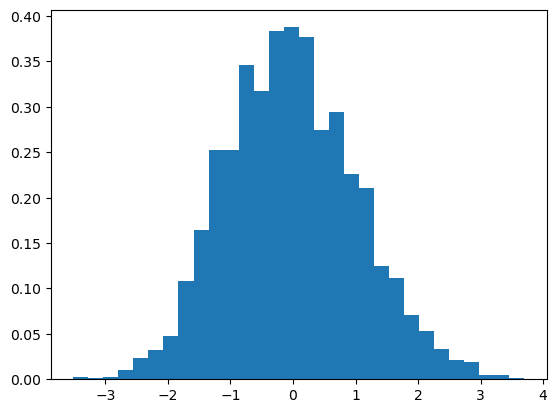

In [2]:
import random
import math

def adaptive_mcmc(target_log_pdf, initial_theta, n_samples, burn_in=1000, adaptation_interval=100):
    """
    Adaptive MCMC (without NumPy, with important caveats - see below).

    Args:
        target_log_pdf: The log of the target probability density function.
        initial_theta: Initial value for the chain.
        n_samples: Total number of samples to generate (including burn-in).
        burn_in: Number of initial samples to discard.
        adaptation_interval: How often to adapt the proposal.

    Returns:
        A list of samples (after burn-in).
    """

    theta = initial_theta
    samples = [theta]
    proposal_std = 1.0  # Initial proposal standard deviation

    for i in range(n_samples):
        # Adaptation (only at specified intervals)
        if i > burn_in and i % adaptation_interval == 0:
            # 1. Estimate properties of the target distribution (e.g., variance) from *past* samples (excluding very recent history if needed).
            past_samples = samples[burn_in:i]
            
            # Calculate mean without numpy
            mean_past_samples = sum(past_samples) / len(past_samples)

            # Calculate std dev without numpy
            std_dev_past_samples = math.sqrt(sum([(x - mean_past_samples)**2 for x in past_samples]) / (len(past_samples) -1 )) if len(past_samples) > 1 else 1.0

            proposal_std = std_dev_past_samples  # Example: Adapt proposal std to posterior std.

            # *Crucial*:  Implement some form of "cooling" or gradual adaptation. Don't change proposal parameters too drastically.
            proposal_std = max(0.1, min(10.0, proposal_std))  # Example: Bound the standard deviation to avoid extreme changes.

        # Proposal (without numpy.random.normal)
        theta_prime = theta + random.gauss(0, proposal_std)  # Normal proposal

        # Acceptance
        log_alpha = target_log_pdf(theta_prime) - target_log_pdf(theta)
        alpha = math.exp(log_alpha)

        if random.uniform(0, 1) < min(1, alpha):
            theta = theta_prime

        samples.append(theta)

    return samples[burn_in:]  # Return samples after burn-in


# Example usage (for a standard normal distribution):
def target_log_pdf(x):
    return -0.5 * x**2  # Log of standard normal PDF (up to a constant)

initial_theta = 0.0
n_samples = 5000
samples = adaptive_mcmc(target_log_pdf, initial_theta, n_samples)

# Analyze the samples
print(sum(samples) / len(samples))  # Mean without numpy
#print(np.std(samples))  # Std dev requires numpy
import matplotlib.pyplot as plt
plt.hist(samples, bins=30, density=True)
plt.show()

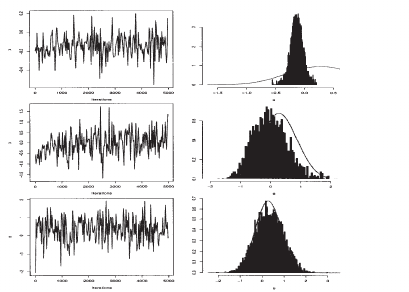

# Geometric Convergence of Metropolis-Hastings Algorithms

## Theorem 7.27 (Geometric Ergodicity)
For marginal probability of acceptance:

$$\text{ess sup}(1-p(z)) = 1$$

## Simulated Annealing Transition

The transition probability for $X^{(i+1)}$ is given by:

$$X^{(i+1)} = \begin{cases} 
\zeta_i & \text{with probability } \exp\{(E(X^{(i)}) - E(\zeta_i))/T\} \wedge 1 \\
X^{(i)} & \text{otherwise}
\end{cases}$$

## Reference Acceptance Rates

For dimension $d$ and correlation between successive iterations:

$$1 + 2\sum_{k=1}^{\infty} \text{corr}(X^{(i)}, X^{(i+k)})$$

The optimal acceptance rate is given by:

$$a = \frac{2}{\pi} \arctan\left(\frac{2}{l}\right)$$

which equals to 0.44 for $a = 2.4$

## Cauchy Distribution Example (7.21)

The posterior distribution on $\theta$ is proportional to:

$$\pi^{ST/100}[(1 + \theta - x_1)^2)(1 + \theta - x_2)^2)(1 + \theta - x_3)^2]^{-1}$$

## Function Estimators

For random walk $C(0,\sigma^2)$, the estimators are:

$$h_1(\theta) = \theta$$

$$h_2(\theta) = \left(\theta - \frac{17}{3}\right)^2$$

$$h_3(\theta) = I_{[4,8]}(\theta)$$

## Performance Metrics from Table 7.7

For varying values of $\sigma$ (0.1 to 12.0):
- Acceptance probability $p_\sigma$
- Intergroup time $t_\sigma$
- Empirical variance of estimators $h_1$, $h_2$, $h_3$

The empirical variances are evaluated through:
- Acceptance probability
- Intergroup time
- Standard deviation of the random walk $\sigma$
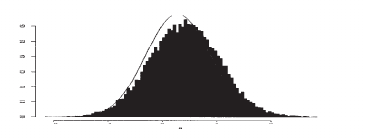

# Langevin Algorithms

## Langevin Diffusion
The Langevin diffusion $L_t$ is defined by the stochastic differential equation:

$$(7.22) \quad dL_t = dB_t + \frac{1}{2}\nabla\log f(L_t)dt$$

where $B_t$ is the standard Brownian motion with properties:
- $B_0 = 0$
- $B_t \sim \mathcal{N}(0, \sigma^2[t])$
- $B_t - B_s$ is independent of $B_r (t > s)$

## Discretization
The discretization of the diffusion algorithm:

$$(7.23) \quad x^{(i+1)} = x^{(i)} + \frac{\sigma^2}{2}\nabla\log f(x^{(i)}) + \sigma\epsilon_i$$

where $\epsilon_i \sim \mathcal{N}(0, I_p)$

## Convergence Limit
The convergence limit condition:

$$(7.24) \quad \lim_{|x| \to \infty} \frac{\nabla^T\log f(x)}{|x|^{-1}} $$

## Metropolis-Hastings Acceptance Ratio
The acceptance probability ratio:

$$\frac{f(\mathcal{Y})}{f(x^{(i)})} \exp\left\{-\left\|\mathcal{Y}_i - x^{(i)} - \frac{\sigma^2}{2}\nabla\log f(x^{(i)})\right\|^2/2\sigma^2\right\} \wedge 1$$

## Taylor Approximation
The random walk type approximation to $f(x^{(i+1)})$ leads to:

$$f(x^{(i+1)}) \propto \exp\left\{(x^{(i+1)} - x^{(i)})^T\nabla\log f(x^{(i)}) - \frac{1}{2}(x^{(i+1)} - x^{(i)})^TH(x^{(i)})(x^{(i+1)} - x^{(i)})\right\}$$

where $H(x^{(i)}) = -\nabla^2\log f(x^{(i)})$ is the Hessian matrix.

## Final Form
Simplifying with $\sigma^2I_p$ leads to:

$$(7.26) \quad x^{(i+1)} = x^{(i)} + \sigma^2\nabla\log f(x^{(i)}) + \sigma\epsilon_i$$

## The Metropolis Algorithm and its Development

This section discusses the historical development of the Metropolis algorithm, its generalization, and its impact on the field of statistical simulation.

### The Genesis of the Metropolis Algorithm

The Metropolis algorithm, a cornerstone of Markov chain Monte Carlo (MCMC) methods, was first published in the *Journal of Chemical Physics* by Metropolis et al. (1953).  This seminal paper emerged from the Los Alamos research laboratory, a hub of scientific innovation during and after World War II.

During the war, scientists at Los Alamos relied on desk calculators, often operated by the wives of the researchers, to analyze the behavior of nuclear explosives.  Later, under the influence of John von Neumann, these calculators were replaced by early computers.

Nicholas Metropolis, a physicist and mathematician who arrived at Los Alamos in 1943, is considered, along with Stanislaw Ulam, a father of Monte Carlo methods.  They not only coined the term "Monte Carlo methods" but also conducted the first computer-based Monte Carlo experiment on the MANIAC (Mathematical Analyzer, Numerical Integrator and Computer) computer in 1948.

### From Los Alamos to Broader Applications

The development of the H-bomb at Los Alamos involved several key figures, including Marshall Rosenbluth, who joined the lab in 1950. Edward Teller, known for his work on the Manhattan Project and his advocacy for the H-bomb, also played a significant role.  His wife, Augusta (Mici) Teller, contributed as a "computer" operating the desk calculators.

### Generalization and Influence

The Metropolis algorithm was later generalized by Hastings (1970) and Peskun (1973, 1981) for broader statistical simulation applications.  Despite earlier papers highlighting its usefulness in specific contexts, the surge in the use of MCMC methods in the statistical community is often attributed to the presentation of the Gibbs sampler by Gelfand and Smith (1990).

The gap of over 30 years between the publication of the Metropolis algorithm and the widespread adoption of MCMC can be partly explained by the limited computing power available during that period.  Many of the problems now tackled with MCMC were computationally infeasible in earlier times.

### The Metropolis-Hastings Algorithm

As shown by Hastings (1970), the Metropolis-Hastings algorithm is part of a broader class of algorithms where the transition is linked to the acceptance probability:

$$
\rho(x, y) = \frac{s(x, y) f(y) q(y|x)}{1 + s(x, y) [f(y) q(y|x) / f(x) q(x|y)]} \wedge 1
$$

where:
*  <span class="math-inline">f\(x\)</span> is the target density
*  <span class="math-inline">q\(y\|x\)</span> is the proposal density of moving from <span class="math-inline">x</span> to <span class="math-inline">y</span>
*  <span class="math-inline">s\(x, y\)</span> is an arbitrary positive symmetric function such that <span class="math-inline">\\rho\(x, y\) \\le 1</span>
*  <span class="math-inline">a \\wedge b \= \\min\(a, b\)</span>

The specific case where <span class="math-inline">s\(x, y\) \= 1</span> is known as the Boltzmann algorithm, often used in physics simulations. However, Peskun (1973) demonstrated that, in discrete spaces, the Metropolis-Hastings algorithm is generally superior in performance to the Boltzmann algorithm.

# Nonidentifiable Normal Model Example 7.29

## Model Specification
Consider a nonidentifiable normal model:

$$Y \sim \mathcal{N}\left(\frac{\theta_1 + \theta_2}{2}, 1\right)$$

associated with the exchangeable prior $\theta_1, \theta_2 \sim \mathcal{N}(0,1)$

## Posterior Distribution
The posterior distribution is given by:

$$(7.27) \quad \pi(\theta_1,\theta_2|y) \propto \exp\left\{-\frac{1}{4}\left[\theta_1^2 + \theta_2^2 + \frac{\theta_1\theta_2}{2} - (\theta_1 + \theta_2)y\right]\right\}$$

## Langevin Transition
The nonidentifiability is addressed through the Langevin transition based on:

$$\mathcal{N}\left(\frac{\sigma^2}{2}\left(2y - \frac{2\theta_1^{(i)} - 5\theta_2^{(i)}}{8}, 4y - \frac{2\theta_2^{(i)} - 5\theta_1^{(i)}}{8}\right), \sigma^2(I_2^{'}, I_2^{'}), \sigma I_2\right)$$

## Convergence Results
For $y = 4.3$:
- Final intervals: (1.973, 1.990)
- Confidence intervals: (1.368, 1.486)
- Acceptance rate calibration: $\sigma = 1.46$ for rate of 1/2

The convergence plot shows:
- Full line: Langevin Metropolis-Hastings simulation
- Dashed line: iid simulation
- 90% equal tail confidence intervals
- Ratio of efficiency approximately 1.3

## Geometric Convergence of Metropolis-Hastings Algorithms

Lemma .6 provides a sufficient condition (7.6) for the irreducibility of the Metropolis-Hastings Markov chain. This condition is particularly well-suited to random walks with transition densities of the form <span class="math-inline">q\(y\|z\) \= g\(y\-z\)</span>.  Specifically, if <span class="math-inline">g</span> is positive in a neighborhood of 0, it ensures the ergodicity of the chain (see Section 7.5 for a detailed analysis).

However, establishing convergence results stronger than simple ergodic convergence (as in Equation 7.1) or total variation convergence is challenging without additional assumptions on <span class="math-inline">f</span> (the target density) and <span class="math-inline">g</span> (the proposal density).  Roberts and Tweedie (1996) demonstrated the existence of chains that are not geometrically ergodic, highlighting the need for specific conditions.

Introducing the concept of *essential supremum*:

$$
\text{ess. sup } h(x) = \inf \{w: \nu(h(z) > w) = 0\}
$$

where <span class="math-inline">\\nu</span> is a measure, they established the following theorem:

**Theorem 7.27.** If the marginal probability of acceptance, denoted by <span class="math-inline">\\bar\{\\rho\}</span>, satisfies

$$
\text{ess. sup } (1 - \bar{\rho}(z)) = 1
$$

then the algorithm (A.24) is not geometrically ergodic.

This implies that if <span class="math-inline">\\bar\{\\rho\}</span> is not bounded away from 1 on a set of measure 1, geometric convergence cannot be guaranteed for algorithm (A.24).  While this result is significant in characterizing weakly convergent Metropolis-Hastings algorithms (see Example 12.10), it doesn't directly help in establishing non-geometric ergodicity due to the often intractable nature of <span class="math-inline">\\bar\{\\rho\}</span>.

For small state spaces (Chapter 6), Roberts and Polson (1994) noted that the chain <span class="math-inline">\(X\_t\)</span> is uniformly ergodic. However, this is rarely the case for uncountable state spaces. Uniform ergodicity is equivalent to Doeblin's condition (Theorem 6.59). Chapter 9 provides examples of continuous Gibbs samplers exhibiting uniform ergodicity (Examples 10.4 and 10.17), but Section 7.5 shows that uniform ergodicity almost never holds for random walks, even though they are a natural choice for instrumental distributions.

## 7.8.3 A Reinterpretation of Simulated Annealing

Consider a function <span class="math-inline">E</span> defined on a finite set <span class="math-inline">\\mathcal\{X\}</span> with a large cardinality, making direct minimization of <span class="math-inline">E</span> by comparing function values infeasible. Simulated annealing (Section 5.2.3) uses a conditional density <span class="math-inline">q\_\{ij\}</span> on <span class="math-inline">\\mathcal\{X\}</span> such that <span class="math-inline">q\_\{ij\} \> 0</span> if and only if <span class="math-inline">\(i, j\) \\in \\mathcal\{X\}^2</span>.  For a given temperature <span class="math-inline">T \> 0</span>, it generates a Markov chain <span class="math-inline">\(X\_t\)</span> on <span class="math-inline">\\mathcal\{X\}</span> with the following transition mechanism:

1. Generate <span class="math-inline">S\_t</span> according to <span class="math-inline">q\(X\_t, \\cdot\)</span>.


This section discusses the conditions for geometric convergence of Metropolis-Hastings algorithms and provides a reinterpretation of simulated annealing. It highlights the challenges in establishing strong convergence results for MCMC methods and introduces the concept of essential supremum.  The connection between the acceptance probability and geometric ergodicity is explored, and the limitations of uniform ergodicity for continuous state spaces are discussed. Finally, it sets the stage for a reinterpretation of simulated annealing as a Markov chain-based optimization technique.

2. Take

$$
X^{(t+1)} = 
\begin{cases} 
\zeta_t, & \text{with probability } \exp((E(X^{(t)}) - E(\zeta_t))/T) \wedge 1 \\
X^{(t)}, & \text{otherwise} 
\end{cases}
$$

As noted in Section 5.2.3, the simulated value <span class="math-inline">\\zeta\_t</span> is automatically accepted when <span class="math-inline">E\(\\zeta\_t\) \\le E\(X^\{\(t\)\}\)</span>. The ability of the simulated annealing algorithm to accept a value <span class="math-inline">E\(\\zeta\_t\)</span> larger than <span class="math-inline">E\(X^\{\(t\)\}\)</span> is a significant advantage, as it allows the method to escape the attraction zones of local minima of <span class="math-inline">E</span> when <span class="math-inline">T</span> is sufficiently large.

The simulated annealing algorithm can be viewed as a Metropolis-Hastings algorithm with a stationary distribution proportional to <span class="math-inline">\\exp\(\-E\(x\)/T\)</span>, provided that the matrix of <span class="math-inline">q\(i\|j\)</span>'s generates an irreducible chain. However, the theory of time-homogeneous Markov chains in Chapter 6 does not cover the case where <span class="math-inline">T</span> varies with <span class="math-inline">t</span> and converges to 0 "slowly enough" (typically in <span class="math-inline">1/\\log t</span>).

### 7.8.4 Reference Acceptance Rates

Roberts et al. (1997) recommend using instrumental distributions with acceptance rates close to 1/4 for high-dimensional models and 1/2 for models of dimension 1 or 2. This heuristic is based on the asymptotic behavior of an efficiency criterion:

$$
\left[ 1 + 2 \sum_{k=0}^{\infty} \text{corr}(X^{(t)}, X^{(t+k)}) \right]^{-1}
$$

When <span class="math-inline">f</span> is the density of the <span class="math-inline">\\mathcal\{N\}\(0,1\)</span> distribution and <span class="math-inline">g</span> is the density of a Gaussian random walk with variance <span class="math-inline">\\sigma^2</span>, Roberts et al. (1997) showed that the optimal choice of <span class="math-inline">\\sigma</span> is 2.4, with an asymmetry in efficiency favoring larger values of <span class="math-inline">\\sigma</span>. The corresponding acceptance rate is:

$$
\rho = \frac{2}{\pi} \arctan\left(\frac{2}{\sigma}\right)
$$

which equals 0.44 for <span class="math-inline">\\sigma \= 2\.4</span>.

A second result by Roberts et al. (1997), based on an approximation of <span class="math-inline">X^\{\(t\)\}</span> as a Langevin diffusion process (Section 7.8.5) when the dimension of the problem goes to infinity, indicates that the acceptance probability converges to 0.234 (approximately 1/4).

An equivalent version of this empirical rule is to set the scale factor in <span class="math-inline">q</span> to <span class="math-inline">2\.38/\\sqrt\{d\} \\Sigma</span>, where <span class="math-inline">d</span> is the model dimension and <span class="math-inline">\\Sigma</span> is the asymptotic variance of <span class="math-inline">X^\{\(t\)\}</span>. This is not an absolute optimality result, as it is based on the specific case of the normal distribution.  Furthermore, <span class="math-inline">\\Sigma</span> is typically unknown in practice.

Implementing this heuristic involves algorithmic calibration (Müller, 1991): successive modifications of scale factors, estimations of <span class="math-inline">\\Sigma</span>, and adjustment of the acceptance rate until it is close to 1/4 and the estimation of <span class="math-inline">\\Sigma</span> stabilizes. Again, until the chain gets closer to the stationary distribution, the variance of the importance weights remains high.

This section discusses the acceptance probability in the context of simulated annealing and provides recommendations for reference acceptance rates in Metropolis-Hastings algorithms. It explains how the choice of proposal distribution parameters can impact the efficiency of the algorithm and introduces the concept of algorithmic calibration to optimize these parameters. The limitations of relying on normal distribution-based heuristics are also highlighted.## Adaptive MCMC: Calibration and Example

This section discusses the calibration of adaptive Metropolis-Hastings algorithms and provides an example to illustrate the challenges and considerations involved.

### Calibration of Adaptive MCMC

Convergence results for Metropolis-Hastings algorithms typically apply when the hyperparameters of the instrumental distribution are fixed.  However, in adaptive versions, these parameters are modified based on simulation results, leading to a heterogeneous Markov chain (or a non-Markovian process if parameters depend on the entire chain history).

Therefore, using a true Metropolis-Hastings algorithm requires a calibration step to determine an acceptable range for the simulation hyperparameters *before* the actual simulation begins.

### Example: Cauchy Posterior Distribution

Consider three independent and identically distributed (iid) Cauchy random variables <span class="math-inline">X\_1, X\_2, X\_3 \\sim C\(0,1\)</span> and a prior distribution <span class="math-inline">\\pi\(\\theta\) \= \\exp\(\-\\theta^2/100\)</span>. The posterior distribution for <span class="math-inline">\\theta</span> is:

$$
\pi(\theta|x_1, x_2, x_3) \propto \frac{\exp(-\theta^2/100)}{(1+(\theta-x_1)^2)(1+(\theta-x_2)^2)(1+(\theta-x_3)^2)}  \quad (7.21)
$$

This distribution can be trimodal when <span class="math-inline">x\_1, x\_2,</span> and <span class="math-inline">x\_3</span> are sufficiently spaced out. For example, with <span class="math-inline">x\_1 \= 0</span>, <span class="math-inline">x\_2 \= 5</span>, and <span class="math-inline">x\_3 \= 9</span>, the distribution exhibits trimodality (see Figure 1.1).

This trimodal distribution is suitable for testing the performance of the Metropolis-Hastings algorithm in a unidimensional setting. Given the spread of the distribution (7.21), a random walk based on a Cauchy distribution <span class="math-inline">C\(0,\\sigma\)</span> is used. (Note: Chapter 9 proposes an alternative approach using the Gibbs sampler).

### Interjump Time and Performance Evaluation

Besides the acceptance probability, a key metric for comparing algorithms is the *interjump time* (<span class="math-inline">t\_a</span>); i.e., the average number of iterations for the chain to move to a different mode.  For the example values, the three modes are approximately in the intervals <span class="math-inline">\(\-\\infty, 0\)</span>, <span class="math-inline">\(0, 13\)</span>, and <span class="math-inline">\(13, \+\\infty\)</span>.

Table 7.7 provides the acceptance probability (<span class="math-inline">\\rho</span>), the interjump time (<span class="math-inline">t\_a</span>), and the empirical variance associated with the approximation of expectations <span class="math-inline">E^\{\\pi\}\[h\_i\(\\theta\)\]</span> (based on 20,000 simulations) for different values of <span class="math-inline">\\sigma</span>.  The functions <span class="math-inline">h\_i\(\\theta\)</span> used are:

$$
\begin{aligned}
h_1(\theta) &= \theta \\
h_2(\theta) &= \left(\theta - \frac{17}{3}\right)^2 \\
h_3(\theta) &= I_{A(4.3)}(\theta)
\end{aligned}
$$

where <span class="math-inline">I\_\{A\(4\.3\)\}\(\\theta\)</span> is an indicator function.

### Results and Observations

The means of the estimators for different <span class="math-inline">\\sigma</span> values are similar: approximately 8.96, 0.063, and 0.35 for <span class="math-inline">h\_1\(\\theta\)</span>, <span class="math-inline">h\_2\(\\theta\)</span>, and <span class="math-inline">h\_3\(\\theta\)</span> respectively.  Importantly, the acceptance probability never falls below 0.88.  Table 7.7 shows that the choice of <span class="math-inline">\\sigma</span> affects the interjump time and the variance of the estimators.  A larger <span class="math-inline">\\sigma</span> might lead to faster exploration of the state space (smaller interjump time) but could also result in less accurate estimations if the acceptance rate is too low.

**(Include Table 7.7 here)**

This example highlights the importance of calibrating the proposal distribution in Metropolis-Hastings algorithms.  The interjump time and the variance of estimators are crucial metrics for assessing the performance of the algorithm.  The choice of the proposal distribution parameters, such as <span class="math-inline">\\sigma</span> in this case, needs to balance exploration and accuracy.  While a high acceptance probability is desirable, it's not the sole determinant of performance.

Roberts et al. (1997) showed that the optimal acceptance rate of 0.234 cannot be achieved with the choice of a normal instrumental distribution with constant variance, regardless of the choice of σ.  This phenomenon is common in practice.

### 7.8.5 Langevin Algorithms

Alternative approaches to the random walk Metropolis-Hastings algorithm can be derived from diffusion theory, as proposed by Grenander and Miller (1994) and Phillips and Smith (1996). The core idea is to find a diffusion equation (or a stochastic differential equation) that yields a diffusion (or continuous-time process) with a stationary distribution *f* and then discretize this process for implementation.

Specifically, the Langevin diffusion $L_t$ is defined by the stochastic differential equation:

$$
dL_t = dB_t + \frac{1}{2} \nabla \log f(L_t) dt  \quad (7.22)
$$

where $B_t$ is standard Brownian motion; i.e., a random function such that $B_0 = 0$, $B_t \sim \mathcal{N}(0, \omega^2 t)$, $B_t - B_{t'}$ is independent of $B_{t''}$ ($t > t' > t''$), and the process is the limit of a simple random walk as the step size $\Delta$ and the time between steps $\tau$ approach zero such that $\lim \Delta / \sqrt{\tau} = \omega$.

As Roberts and Rosenthal (1998) emphasize, the Langevin diffusion (7.22) is the unique non-explosive diffusion that is reversible with respect to *f*.

The implementation involves discretizing (7.22):

$$
x^{(t+1)} = x^{(t)} + \frac{\sigma^2}{2} \nabla \log f(x^{(t)}) + \sigma \epsilon_t  \quad (7.23)
$$

where $\epsilon_t \sim \mathcal{N}(0, I_p)$ and $\sigma^2$ corresponds to the discretization size (see Problem 7.45).

While this discretization aims to replicate the convergence of the random walk to Brownian motion, the behavior of the Markov chain (7.23) can differ significantly from the diffusion process (7.22). Roberts and Tweedie (1995) showed that (7.23) can be transient.  A sufficient condition for transience is that the limits:

$$
\lim_{|x| \to \infty} \sigma^{-2} \nabla \log f(x) \quad (7.24)
$$

exist and are larger than 1 and smaller than -1 at $+\infty$ and $-\infty$, respectively.  This implies that moves are necessarily one-sided for large $|x|$.

Note the similarity between (7.23) and the stochastic gradient equation:

$$
x^{(t+1)} = x^{(t)} + \frac{\sigma}{2} \nabla \log f(x^{(t)}) + \sigma \epsilon_t  \quad (7.25)
$$

To mitigate this transience, Besag (1994) suggested treating (7.23) as a Metropolis-Hastings instrumental distribution.  The new value $Y$ is accepted with probability:

$$
\min\left\{1, \frac{f(Y) q(x^{(t)}|Y)}{f(x^{(t)}) q(Y|x^{(t)})} \right\}
$$

where $q(x|y)$ is the transition density associated with (7.23).  This adjustment often corrects the undesirable behavior.

$$
\frac{f(Y_i)}{f(x^{(t)})} \exp\left\{ -\frac{\left\| Y_i - x^{(t)} - \frac{\sigma^2}{2} \nabla \log f(x^{(t)}) \right\|^2}{2\sigma^2} \right\} \wedge 1
$$

$$
\frac{f(Y_i)}{f(x^{(t)})} \exp\left\{ -\frac{\left\| x^{(t)} - Y_i - \frac{\sigma^2}{2} \nabla \log f(Y_i) \right\|^2}{2\sigma^2} \right\} \wedge 1
$$

The corresponding Metropolis-Hastings algorithm will not necessarily outperform the regular random walk Metropolis-Hastings algorithm. Roberts and Tweedie (1995) showed that the resulting chain is not geometrically ergodic when $\nabla \log f(x)$ goes to 0 at infinity, similar to the random walk case. However, the (basic) ergodicity of the chain is ensured.

Roberts and Rosenthal (1998) provided further insights into choosing the scaling factor $\sigma$, suggesting an acceptance rate of 0.574 for optimal convergence when the components of $x$ are uncorrelated under $f$.

The proposal distribution (7.23) is natural from a Laplace approximation perspective, corresponding to a second-order approximation of $f$. By Taylor expansion:

$$
\log f(x^{(t+1)}) = \log f(x^{(t)}) + (x^{(t+1)} - x^{(t)})^T \nabla \log f(x^{(t)}) + \frac{1}{2} (x^{(t+1)} - x^{(t)})^T [\nabla^2 \log f(x^{(t)})] (x^{(t+1)} - x^{(t)})
$$

The random walk type approximation to $f(x^{(t+1)})$ is:

$$
f(x^{(t+1)}) \propto \exp\left\{ (x^{(t+1)} - x^{(t)})^T \nabla \log f(x^{(t)}) - \frac{1}{2} (x^{(t+1)} - x^{(t)})^T H(x^{(t)}) (x^{(t+1)} - x^{(t)}) \right\}
$$

$$
\propto \exp\left\{ -\frac{1}{2} (x^{(t+1)})^T H(x^{(t)}) x^{(t+1)} + (x^{(t+1)})^T [\nabla \log f(x^{(t)}) + H(x^{(t)}) x^{(t)}] \right\}
$$

$$
\propto \exp\left\{ -\frac{1}{2} [x^{(t+1)} - x^{(t)} - (H(x^{(t)}))^{-1} \nabla \log f(x^{(t)})]^T H(x^{(t)}) [x^{(t+1)} - x^{(t)} - (H(x^{(t)}))^{-1} \nabla \log f(x^{(t)})] \right\}
$$

where $H(x^{(t)}) = -\nabla^2 \log f(x^{(t)})$ is the Hessian matrix. Simplifying this with $H(x^{(t)}) \approx \sigma^2 I_p$ leads to the random walk with drift term:

$$
x^{(t+1)} = x^{(t)} + \sigma^2 \nabla \log f(x^{(t)}) + \sigma \epsilon_t \quad (7.26)
$$

From an exploratory perspective, adding the gradient of $\log f$ is relevant as it guides moves toward the modes of $f$, requiring only minimal knowledge of the density (constants are not needed). In challenging scenarios, exact gradients can be replaced by numerical derivatives.

The authors also showed that this corresponds to a variance of order $p^{-1/3}$, while the optimal variance for the Metropolis-Hastings algorithm is of order $p^{-1}$ (Roberts et al., 1997).

0.036434470181698604


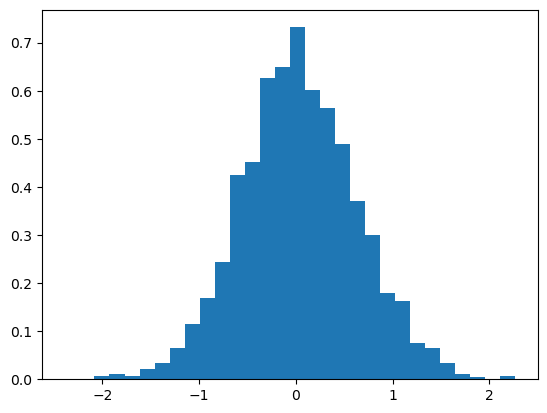

In [3]:
import random
import math

def metropolis_hastings_with_drift(target_log_pdf, initial_theta, n_samples, sigma):
    """
    Metropolis-Hastings algorithm with a drift term (Langevin-like).

    Args:
        target_log_pdf: The log of the target probability density function.
        initial_theta: Initial value for the chain.
        n_samples: Number of samples to generate.
        sigma: The scaling factor (related to discretization size).

    Returns:
        A list of samples.
    """

    theta = initial_theta
    samples = [theta]

    for _ in range(n_samples):
        # Calculate the drift term (gradient of log target density)
        drift = 0.5 * sigma**2 * gradient_log_pdf(theta, target_log_pdf) #0.5*sigma^2 is added here

        # Proposal (with drift)
        theta_prime = theta + drift + sigma * random.gauss(0, 1)  # Normal proposal

        # Acceptance ratio calculation
        log_alpha = target_log_pdf(theta_prime) - target_log_pdf(theta)

        # Hastings ratio calculation (due to the asymmetry from the drift term)
        # We need to calculate the proposal densities q(theta_prime|theta) and q(theta|theta_prime)
        # For a normal distribution with mean 'mu' and std dev 'sigma', the log pdf at 'x' is:
        # log_pdf = -0.5 * ((x - mu) / sigma)**2 - 0.5 * math.log(2 * math.pi) - math.log(sigma)
        log_q_theta_prime_given_theta =  -0.5 * ((theta_prime - (theta + drift)) / sigma)**2  - 0.5 * math.log(2 * math.pi) - math.log(sigma)
        log_q_theta_given_theta_prime = -0.5 * ((theta - (theta_prime - 0.5 * sigma**2 * gradient_log_pdf(theta_prime, target_log_pdf))) / sigma)**2  - 0.5 * math.log(2 * math.pi) - math.log(sigma)


        log_alpha += log_q_theta_given_theta_prime - log_q_theta_prime_given_theta

        alpha = math.exp(log_alpha)

        if random.uniform(0, 1) < min(1, alpha):
            theta = theta_prime

        samples.append(theta)

    return samples


def gradient_log_pdf(x, target_log_pdf):
    """
    Approximates the gradient of the log target density using central differences.
    (Replace with your actual gradient if available)
    """
    delta = 0.001  # Small change for numerical derivative
    grad = (target_log_pdf(x + delta) - target_log_pdf(x - delta)) / (2 * delta)
    return grad


# Example usage (for a standard normal distribution):
def target_log_pdf(x):
    return -0.5 * x**2  # Log of standard normal PDF (up to a constant)

initial_theta = 0.0
n_samples = 5000
sigma = 1.0  # Adjust this parameter

samples = metropolis_hastings_with_drift(target_log_pdf, initial_theta, n_samples, sigma)

# Analyze the samples
print(sum(samples) / len(samples))  # Mean without numpy

import matplotlib.pyplot as plt
plt.hist(samples, bins=30, density=True)
plt.show()

# 7 The Metropolis-Hastings Algorithm

Stramer and Tweedie (1999b) start from the lack of uniform minimal performances of (7.23) to build up modifications (see Problem 7.49) which avoid some pathologies of the basic Langevin Metropolis-Hastings algorithm. They obtain general geometric and uniformly ergodic convergence results.

**Example 7.29. Nonidentifiable normal model.** 

To illustrate the performance of the Langevin diffusion method in a more complex setting, consider the nonidentifiable model:

$$Y \sim N\left(\frac{\theta_1 + \theta_2}{2}, 1\right)$$

associated with the exchangeable prior $\theta_1, \theta_2 \sim \mathcal{N}(0, 1)$. The posterior distribution is:

$$
\pi(\theta_1, \theta_2 | y) \propto \exp\left(-\frac{1}{2}\left\{\frac{5}{4}\theta_1^2 + \frac{5}{4}\theta_2^2 + \frac{\theta_1\theta_2}{2} - (\theta_1 + \theta_2)y\right\}\right) \quad (7.27)
$$

This distribution is well-defined (and can be simulated directly, see Problem 7.47), with a ridge-like structure due to the nonidentifiability. The Langevin transition is then based on the proposal:

$$
\mathcal{N}_2\left(\frac{\sigma^2}{2}\left(\frac{2y - 2\theta_2^{(t)} - 5\theta_1^{(t)}}{8}, \frac{4y - 2\theta_1^{(t)} - 5\theta_2^{(t)}}{8}\right) + (\theta_1^{(t)}, \theta_2^{(t)}), \sigma^2 I_2\right)
$$

A preliminary calibration then leads to $\sigma = 1.46$ for an acceptance rate of $1/2$. 

**(Figure 7.9 would be inserted here)**

**Fig. 7.9.** Convergence of the empirical averages for the Langevin Metropolis-Hastings (full line) and iid simulation (dashes) of $(\theta_1, \theta_2)$ for the estimation of $E[\theta_1|y]$ and corresponding 90% equal tail confidence intervals when $y = 4.3$. The final intervals are [1.373, 1.499] and [1.388, 1.486] for the Langevin and exact algorithms, respectively.

As seen in Figure 7.9, the 90% range is larger for the output of the Langevin algorithm than for an iid sample in the approximation of $E[\theta_1|y]$, but the ratio of these ranges is only approximately 1.3, which shows a moderate loss of efficiency in using the Langevin approximation.

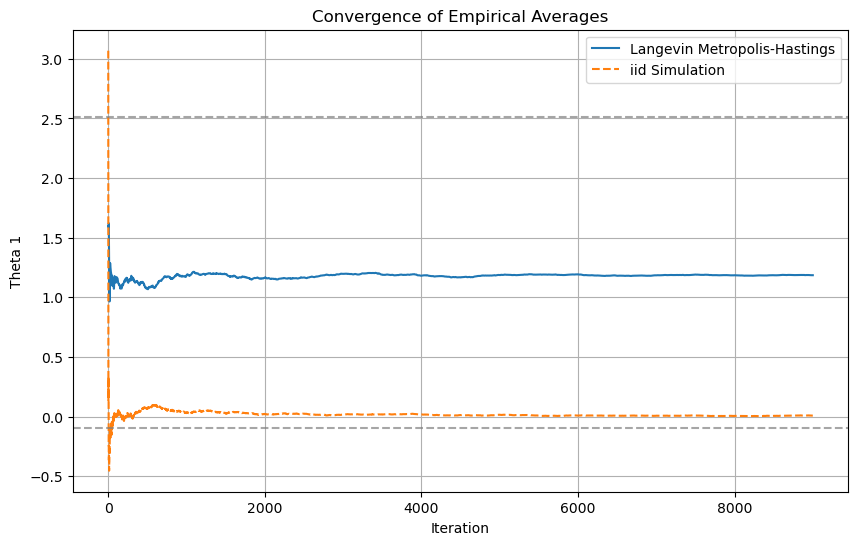

90% Confidence Interval for Theta 1 (Langevin): [-0.093, 2.512]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains
theta = np.zeros((n_samples, 2))
theta[0] = np.random.normal(0, 1, 2)  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]
    
    # Langevin proposal
    mean_proposal = (sigma**2 / 2) * np.array([
        (2*y - 2*theta_current[1] - 5*theta_current[0]) / 8,
        (4*y - 2*theta_current[0] - 5*theta_current[1]) / 8
    ]) + theta_current
    theta_proposal = np.random.multivariate_normal(mean_proposal, sigma**2 * np.eye(2))

    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    # The proposal distribution is symmetric, so the ratio cancels out.
    log_alpha = log_pi_proposal - log_pi_current 
    alpha = np.exp(log_alpha)

    # Accept or reject
    if np.random.uniform() < alpha:
        theta[t] = theta_proposal
    else:
        theta[t] = theta_current

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages
theta_means = np.cumsum(theta_after_burnin, axis=0) / np.arange(1, len(theta_after_burnin) + 1)[:, np.newaxis]

# Calculate quantiles for confidence intervals
quantiles = np.quantile(theta_after_burnin[:, 0], [0.05, 0.95])  # 90% interval

# Plotting
plt.figure(figsize=(10, 6))

# Plot empirical averages
plt.plot(theta_means[:, 0], label='Langevin Metropolis-Hastings')

# Simulate from the prior for comparison (iid samples)
iid_samples = np.random.normal(0, 1, size=(len(theta_after_burnin), 2))
iid_means = np.cumsum(iid_samples[:, 0], axis=0) / np.arange(1, len(iid_samples) + 1)
plt.plot(iid_means, label='iid Simulation', linestyle='--')

# Plot confidence intervals
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")


# For comparison with exact algorithm (which you'd need to implement):
# print(f"90% Confidence Interval for Theta 1 (Exact): [..., ...]")

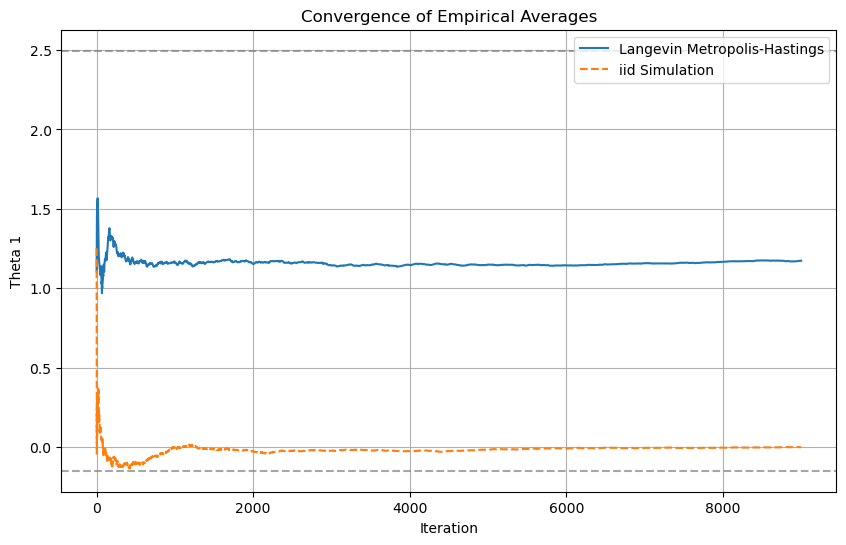

90% Confidence Interval for Theta 1 (Langevin): [-0.149, 2.496]


In [5]:
import math
import random
import matplotlib.pyplot as plt

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains (using lists instead of numpy arrays)
theta = [[0.0, 0.0] for _ in range(n_samples)]  # Initialize with lists
theta[0] = [random.gauss(0, 1), random.gauss(0, 1)]  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]

    # Langevin proposal (manual calculation without numpy)
    mean_proposal = [
        (sigma**2 / 2) * ((2*y - 2*theta_current[1] - 5*theta_current[0]) / 8) + theta_current[0],
        (sigma**2 / 2) * ((4*y - 2*theta_current[0] - 5*theta_current[1]) / 8) + theta_current[1]
    ]

    theta_proposal = [random.gauss(mean_proposal[0], sigma), random.gauss(mean_proposal[1], sigma)]


    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    log_alpha = log_pi_proposal - log_pi_current
    alpha = math.exp(log_alpha)  # Use math.exp

    # Accept or reject
    if random.random() < alpha:
        theta[t] = theta_proposal[:] # Create a copy to avoid modifying the proposal
    else:
        theta[t] = theta_current[:] # Create a copy

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages (manual calculation without numpy)
theta_means = []
cumulative_sum_0 = 0.0
for i in range(len(theta_after_burnin)):
    cumulative_sum_0 += theta_after_burnin[i][0]
    theta_means.append([cumulative_sum_0 / (i + 1)])

# Calculate quantiles for confidence intervals (manual calculation without numpy)
theta_values_for_quantile = [val[0] for val in theta_after_burnin]
theta_values_for_quantile.sort() # Sort to find quantiles
lower_index = int(0.05 * len(theta_values_for_quantile))
upper_index = int(0.95 * len(theta_values_for_quantile))

quantiles = [theta_values_for_quantile[lower_index], theta_values_for_quantile[upper_index]]


# --- IID Simulation (without numpy) ---
iid_samples = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(len(theta_after_burnin))]
iid_means = []
cumulative_sum_iid = 0.0
for i in range(len(iid_samples)):
    cumulative_sum_iid += iid_samples[i][0]
    iid_means.append([cumulative_sum_iid / (i+1)])


# Plotting (using lists with matplotlib)
plt.figure(figsize=(10, 6))
plt.plot([val[0] for val in theta_means], label='Langevin Metropolis-Hastings') # Plot from lists
plt.plot([val[0] for val in iid_means], label='iid Simulation', linestyle='--')
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")